In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline

In [96]:
# TODO: Improve general flow of training, cross-validating and testing model (e.g. notes from lecture how to divide the data).

## 1. Data wrangling

In [97]:
data1_X = np.loadtxt("datasets/ex8data1_X.txt", delimiter=",")

In [98]:
data1_X[:5]

array([[ 13.047,  14.741],
       [ 13.409,  13.763],
       [ 14.196,  15.853],
       [ 14.915,  16.174],
       [ 13.577,  14.043]])

In [99]:
data1_X.shape

(307, 2)

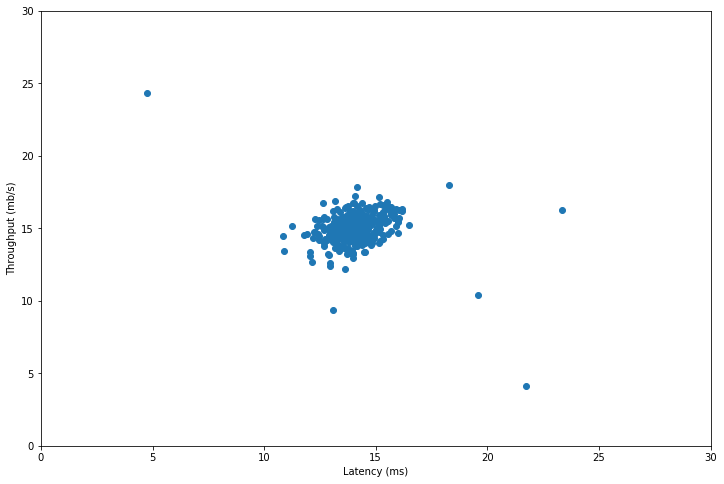

In [100]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.scatter(data1_X[:, 0], data1_X[:, 1])
axes.set_xlim([0, 30])
axes.set_ylim([0, 30])
axes.set_xlabel("Latency (ms)")
axes.set_ylabel("Throughput (mb/s)")

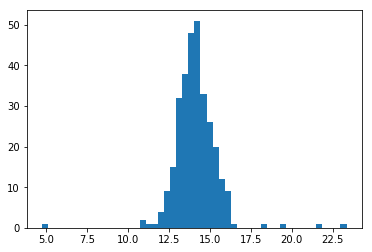

In [101]:
plt.hist(data1_X[:, 0], bins=50);

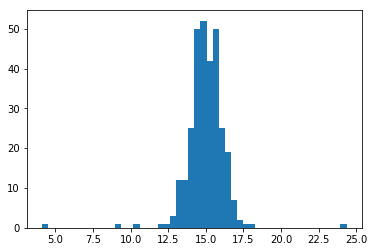

In [102]:
plt.hist(data1_X[:, 1], bins=50);

In [103]:
data1_Xval = np.loadtxt("datasets/ex8data1_Xval.txt", delimiter=",")

In [104]:
data1_Xval[:5]

array([[ 15.79 ,  14.921],
       [ 13.64 ,  15.33 ],
       [ 14.866,  16.474],
       [ 13.585,  13.989],
       [ 13.464,  15.635]])

In [105]:
data1_Xval.shape

(307, 2)

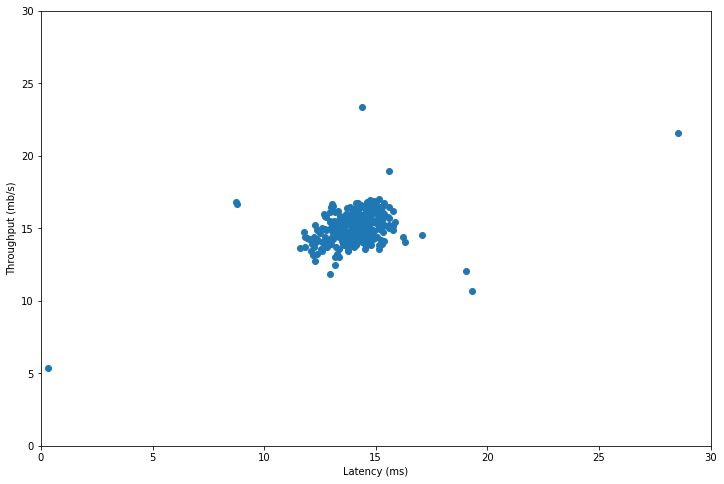

In [106]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.scatter(data1_Xval[:, 0], data1_Xval[:, 1])
axes.set_xlim([0, 30])
axes.set_ylim([0, 30])
axes.set_xlabel("Latency (ms)")
axes.set_ylabel("Throughput (mb/s)")

In [107]:
data1_yval = np.loadtxt("datasets/ex8data1_yval.txt", delimiter=",")

In [108]:
data1_yval[:5]

array([ 0.,  0.,  0.,  0.,  0.])

In [109]:
data1_yval.shape

(307,)

## 2. Estimate datasets statistics

In [110]:
def estimate_gaussian_params(X):
    return X.mean(axis=0), X.var(axis=0)

In [111]:
mu, sigma2 = estimate_gaussian_params(data1_X)

In [112]:
mu

array([ 14.11225277,  14.99767459])

In [113]:
sigma2

array([ 1.8326777 ,  1.70971534])

In [114]:
def multivariate_gaussian(X, mu, sigma2):
    # http://cs229.stanford.edu/section/gaussians.pdf
    # Reimplemented it from course assignmnent matlab code give in the course.
    # Do not understand what equation is it.
    
    n = X.shape[1]
    X = X - mu
    sigma2 = np.diag(sigma2)

    frac_expr = (2 * np.pi) ** (- n / 2) * np.linalg.det(sigma2) ** -0.5
    exp_expr = np.exp(-0.5 * np.sum(X @ np.linalg.inv(sigma2) * X, axis=1))
    p = frac_expr * exp_expr

    return p

In [115]:
p_train = multivariate_gaussian(data1_X, mu, sigma2)

In [116]:
p_train

array([  6.47133258e-02,   5.03040097e-02,   7.24548692e-02,
         5.03171714e-02,   6.36962676e-02,   4.24386180e-02,
         4.79010221e-02,   3.65171430e-02,   1.86635896e-02,
         5.06695418e-02,   2.65160793e-02,   8.47102822e-02,
         7.10492642e-02,   6.95645708e-02,   3.77939963e-02,
         8.27074535e-02,   8.77959656e-02,   8.68769898e-02,
         6.91800944e-02,   9.73071015e-03,   7.57085319e-02,
         8.83777286e-02,   3.74176620e-02,   8.71393803e-02,
         4.12615119e-02,   2.48796251e-02,   7.91026458e-02,
         7.59305679e-02,   8.08237699e-02,   7.66360280e-02,
         5.01244877e-02,   8.80455102e-02,   6.17994704e-02,
         5.96278726e-02,   2.09053692e-02,   4.58073149e-02,
         3.53512898e-02,   8.21316277e-02,   7.24289126e-02,
         8.49723935e-02,   6.42008870e-02,   6.64907632e-02,
         8.37491061e-02,   8.57575824e-02,   6.94419599e-02,
         5.88649135e-02,   3.30570324e-02,   7.02933288e-02,
         7.77404607e-02,

In [117]:
# TODO: Implement contour plot with probabilities.

## 3. Find outliers

In [118]:
p_val = multivariate_gaussian(data1_Xval, mu, sigma2)

In [119]:
p_val

array([  4.16436668e-02,   8.19149698e-02,   4.07080905e-02,
         6.18950110e-02,   7.11926188e-02,   4.24376307e-02,
         6.01945627e-02,   8.40267526e-02,   2.10926089e-02,
         7.70116575e-02,   7.99318511e-02,   4.26373809e-02,
         5.29680043e-02,   1.45737424e-02,   5.43546874e-02,
         4.40540010e-02,   4.36265950e-02,   5.70367965e-02,
         7.61303259e-02,   4.56897419e-02,   8.72861491e-02,
         3.48585877e-02,   8.46148386e-02,   7.21507054e-02,
         7.34971650e-02,   8.29480310e-02,   4.38033103e-02,
         7.12795683e-02,   4.25227922e-02,   6.78148626e-02,
         8.34222347e-02,   6.26813338e-02,   7.09314115e-02,
         8.87722976e-02,   6.39035046e-02,   7.22407015e-02,
         6.59101739e-02,   2.41995807e-02,   5.41959483e-02,
         8.69915697e-02,   5.65421785e-02,   3.59197040e-02,
         6.33436629e-02,   8.38149893e-02,   8.89782171e-02,
         7.43715015e-02,   3.60296048e-02,   8.51214701e-02,
         7.53537903e-02,

In [120]:
def select_threshold(y, p):
    
    best_epsilon = 0
    best_f1 = 0
    
    stepsize = (np.max(p) - np.min(p)) / 1000
    epsilon_vals = np.arange(np.min(p), np.max(p), stepsize)

    for epsilon in epsilon_vals:
        predictions = (p < epsilon).astype(np.float64)        
        tn = np.sum((y == 0) & (predictions == 0))
        tp = np.sum((y == 1) & (predictions == 1))
        fn = np.sum((y == 1) & (predictions == 0))
        fp = np.sum((y == 0) & (predictions == 1))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        f1 = (2 * prec * rec) / (prec + rec)
        if f1 > best_f1:
            best_epsilon = epsilon
            best_f1 = f1
    return best_epsilon, best_f1


In [121]:
epsilon, f1 = select_threshold(data1_yval, p_val)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in long_scalars


In [122]:
assert round(epsilon, 7) == 8.99e-05, "Error"

In [123]:
assert round(f1, 5) == 0.875000, "Error"

In [53]:
epsilon

8.9908366373197453e-05

In [69]:
f1

0.87500000000000011

In [84]:
outliers = p_train < epsilon
outliers

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [72]:
# TODO: Plot red circle to mark anolaous points (anomalies).

## 4. Multidimensional Outliers

In [128]:
data2_X = np.loadtxt("datasets/ex8data2_X.txt", delimiter=",")
data2_Xval = np.loadtxt("datasets/ex8data2_Xval.txt", delimiter=",")
data2_yval = np.loadtxt("datasets/ex8data2_yval.txt", delimiter=",")

In [129]:
mu, sigma2 = estimate_gaussian_params(data2_X)

In [130]:
p_train = multivariate_gaussian(data2_X, mu, sigma2)

In [131]:
p_val = multivariate_gaussian(data2_Xval, mu, sigma2)

In [132]:
epsilon, f1 = select_threshold(data2_yval, p_val)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in long_scalars


In [133]:
assert round(epsilon, 20) == 1.38e-18, "Error"

In [163]:
assert round(f1, 5) == 0.61538, "Error"

In [135]:
epsilon

1.3772202427164249e-18

In [136]:
f1

0.61538461538461542

In [137]:
outliers = p_train < epsilon

In [138]:
assert np.sum(outliers) == 117, "Error"

In [139]:
np.sum(outliers)

117